#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


## Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/Labtest698

/content/drive/MyDrive/Labtest698


In [3]:
ls

app_predict_penguin_65130701938.py  LabTest-938.ipynb              requirements.txt
confusion_matrix_randforest.png     model_penguin_65130701938.pkl
LabTest-65130701938.ipynb           penguins_size.csv


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null 

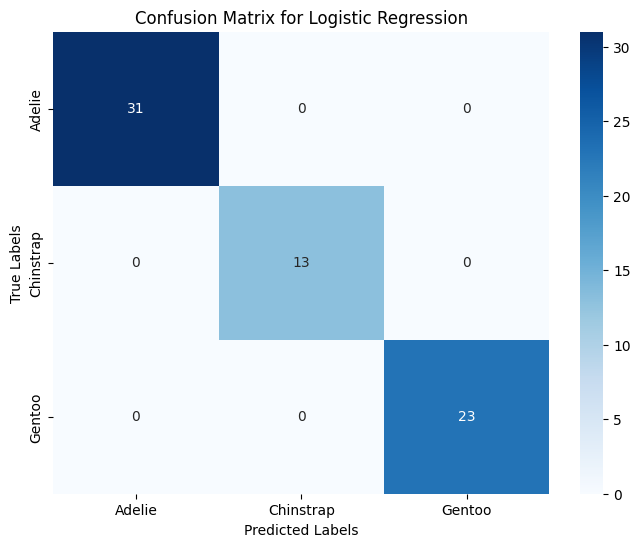

In [4]:
# นำเข้าห้องสมุดที่จำเป็น
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. โหลดข้อมูล
data = pd.read_csv('penguins_size.csv')

# 2. สำรวจข้อมูล
print(data.head())
print(data.info())
print(data.isnull().sum())  # ตรวจสอบค่าว่างในแต่ละคอลัมน์

# 3. จัดการค่าว่าง (Cleansing Data)
data.dropna(inplace=True)  # ลบแถวที่มีค่าว่าง

# 4. การเข้ารหัส (Encoding)
# แปลงคอลัมน์ 'species' เป็นตัวเลขเพื่อใช้เป็นเป้าหมาย (Target Variable)
species_encoder = LabelEncoder()
data['species'] = species_encoder.fit_transform(data['species'])

# แปลงคอลัมน์ 'island' และ 'sex' เป็นตัวเลขเพื่อใช้เป็นตัวแปรคุณลักษณะ (Feature Variables)
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
data['island'] = island_encoder.fit_transform(data['island'])
data['sex'] = sex_encoder.fit_transform(data['sex'])

# 5. แยกข้อมูลเป็นตัวแปรเป้าหมายและคุณลักษณะ
X = data[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = data['species']

# 6. แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. ปรับขนาดข้อมูล (Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. สร้างโมเดล Logistic Regression และฝึกโมเดล
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 9. ทำการพยากรณ์ (Prediction)
y_pred = model.predict(X_test)

# 10. ประเมินประสิทธิภาพโมเดล
# รายงานการจำแนกประเภท (Classification Report)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=species_encoder.classes_))

# เมทริกซ์การสับสน (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)

# แสดงผล Confusion Matrix ด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_encoder.classes_, yticklabels=species_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [5]:
import pickle

# 1. บันทึกโมเดลด้วย pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# 2. บันทึกตัวแปลงค่า (encoders) และ scaler ด้วย pickle (หากต้องการใช้งานในอนาคต)
with open('species_encoder.pkl', 'wb') as file:
    pickle.dump(species_encoder, file)

with open('island_encoder.pkl', 'wb') as file:
    pickle.dump(island_encoder, file)

with open('sex_encoder.pkl', 'wb') as file:
    pickle.dump(sex_encoder, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and encoders have been saved successfully.")


Model and encoders have been saved successfully.


In [7]:
%%writefile app_predict_penguin_65130701938.py

import streamlit as st
import pickle
import numpy as np

# โหลดโมเดลและ encoders
with open('model_penguin_65130701938.pkl', 'rb') as file:
    model = pickle.load(file)

with open('species_encoder.pkl', 'rb') as file:
    species_encoder = pickle.load(file)

with open('island_encoder.pkl', 'rb') as file:
    island_encoder = pickle.load(file)

with open('sex_encoder.pkl', 'rb') as file:
    sex_encoder = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# ชื่อแอป
st.title("Penguin Species Prediction App")

# ฟอร์มกรอกข้อมูล
st.header("Input Features")

# รับค่าจากผู้ใช้
island = st.selectbox("Island", island_encoder.classes_)
culmen_length_mm = st.number_input("Culmen Length (mm)", min_value=20.0, max_value=70.0, step=0.1)
culmen_depth_mm = st.number_input("Culmen Depth (mm)", min_value=10.0, max_value=30.0, step=0.1)
flipper_length_mm = st.number_input("Flipper Length (mm)", min_value=150.0, max_value=250.0, step=0.1)
body_mass_g = st.number_input("Body Mass (g)", min_value=2500.0, max_value=6500.0, step=0.1)
sex = st.selectbox("Sex", sex_encoder.classes_)

# แปลงข้อมูลจากผู้ใช้
if st.button("Predict Species"):
    # แปลงข้อมูล categorical ด้วย encoders
    island_encoded = island_encoder.transform([island])[0]
    sex_encoded = sex_encoder.transform([sex])[0]

    # รวมข้อมูลทั้งหมด
    input_data = np.array([[island_encoded, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex_encoded]])

    # Scale ข้อมูล
    input_data_scaled = scaler.transform(input_data)

    # ทำนายผล
    prediction = model.predict(input_data_scaled)
    species = species_encoder.inverse_transform(prediction)

    # แสดงผลลัพธ์
    st.subheader("Predicted Species")
    st.write(f"The predicted species is: **{species[0]}**")



Overwriting app_predict_penguin_65130701938.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [9]:
%%writefile requirements.txt

scikit-learn
pandas
streamlit
numpy



Overwriting requirements.txt
